DATA PREPARATION

Data Transformation

In [1]:
import torchvision.transforms as transforms
import torch

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resizing to 224x224 pixels
    transforms.ToTensor(),  # Converting to PyTorch tensor

    # Normalization- process of scaling pixel intensity values to a common range
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet values
])

Visualising the transformed image

<>:50: SyntaxWarning: invalid escape sequence '\B'
<>:50: SyntaxWarning: invalid escape sequence '\B'
C:\Users\sastu\AppData\Local\Temp\ipykernel_4696\3372289031.py:50: SyntaxWarning: invalid escape sequence '\B'
  image_path = "test\Benign\BreaDM-Be-1810\SUB1\p-030.jpg "


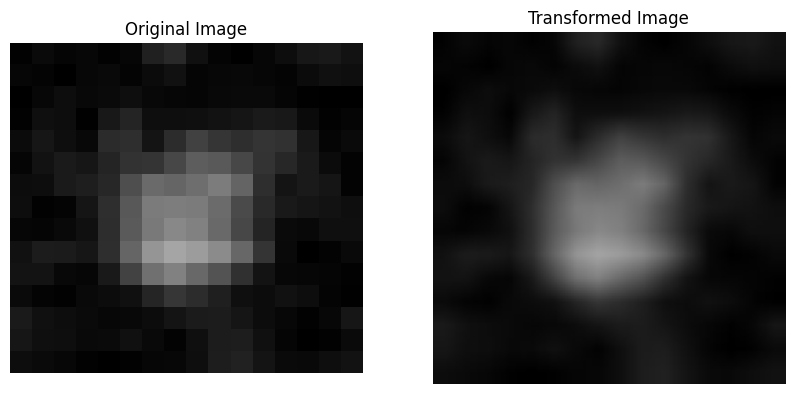

In [3]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

def show_image_transformation(image_path):
    """
    Load an image from a path, apply transformation, and display both original and transformed images.

    Args:
        image_path (str): Path to the image file.
    """
    # Load the image
    image = Image.open(image_path).convert("RGB")
    
    # Define the transformation (example: resize, convert to tensor, normalize)
    transform = transforms.Compose([
        transforms.Resize((128, 128)),  # Resize to 128x128
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])
    
    # Apply the transformation
    transformed_image = transform(image)
    
    # Unnormalize for visualization
    unnormalize = transforms.Normalize(
        mean=[-0.5 / 0.5, -0.5 / 0.5, -0.5 / 0.5],
        std=[1 / 0.5, 1 / 0.5, 1 / 0.5]
    )
    unnormalized_image = unnormalize(transformed_image)
    
    # Convert tensor to numpy array for visualization
    original_image_np = transforms.ToTensor()(image).permute(1, 2, 0).numpy()
    transformed_image_np = unnormalized_image.permute(1, 2, 0).numpy().clip(0, 1)
    
    # Plot both images
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(original_image_np)
    axs[0].set_title("Original Image")
    axs[0].axis("off")
    
    axs[1].imshow(transformed_image_np)
    axs[1].set_title("Transformed Image")
    axs[1].axis("off")
    
    plt.show()

# Usage example
image_path = "test\Benign\BreaDM-Be-1810\SUB1\p-030.jpg "
show_image_transformation(image_path)


Data Augumentation

In [4]:
# Define data augmentation with additional techniques
augmentation_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.RandomRotation(10),  # Random rotation
    transforms.RandomCrop(224, padding=4),  # Random crop with padding
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Random color jitter
    transforms.RandomGrayscale(p=0.1),  # Randomly convert image to grayscale with a probability of 0.1
    transforms.RandomPerspective(distortion_scale=0.5, p=0.5),  # Random perspective transformation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

Visualizing the Augmentated Image

<>:7: SyntaxWarning: invalid escape sequence '\B'
<>:7: SyntaxWarning: invalid escape sequence '\B'
C:\Users\sastu\AppData\Local\Temp\ipykernel_4696\321569152.py:7: SyntaxWarning: invalid escape sequence '\B'
  image_path = 'test\Benign\BreaDM-Be-1810\SUB1\p-030.jpg '


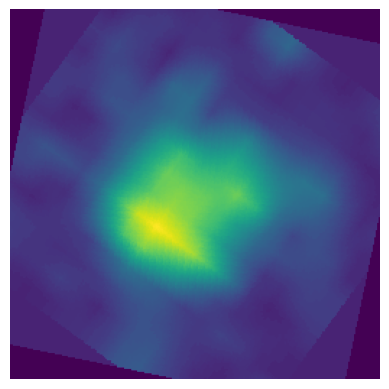

In [5]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load an example image (replace 'path_to_image.jpg' with the path to your image)
image_path = 'test\Benign\BreaDM-Be-1810\SUB1\p-030.jpg '
image = Image.open(image_path)

# Define the augmentation transforms
transform = transforms.Compose([
    transforms.Resize((256, 256)),          # Resize to 256x256
    transforms.RandomHorizontalFlip(),       # Randomly flip image horizontally
    transforms.RandomRotation(30),           # Randomly rotate by up to 30 degrees
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5), # Random brightness, contrast, saturation
    transforms.RandomAffine(15),             # Random affine transformation
])

# Apply the transformations to the image
augmented_image = transform(image)

# Convert the image to a format suitable for displaying
plt.imshow(augmented_image)
plt.axis('off')  # Turn off axis
plt.show()
